Check R and Python code for HW6, question 1.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
from scipy.special import expit
import seaborn as sns

In [2]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

<IPython.core.display.Javascript object>

In [3]:
# Run R code for comparison of code
%load_ext rpy2.ipython

<IPython.core.display.Javascript object>

In [4]:
%%R                                       # All R cells will be indicated with %%R at the top of the cell
suppressMessages(library(tidyverse))
suppressMessages(library(rethinking))

<IPython.core.display.Javascript object>

# McElreath R code with Exp(0.1)

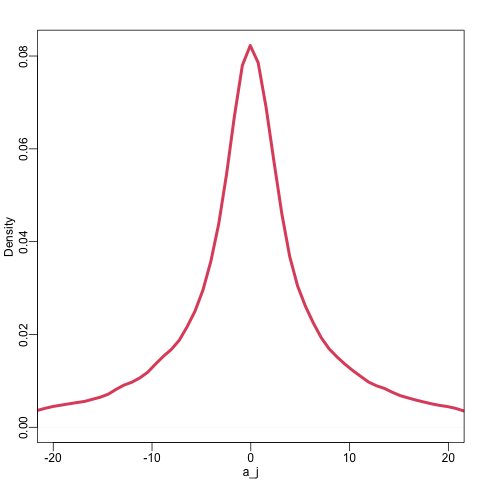

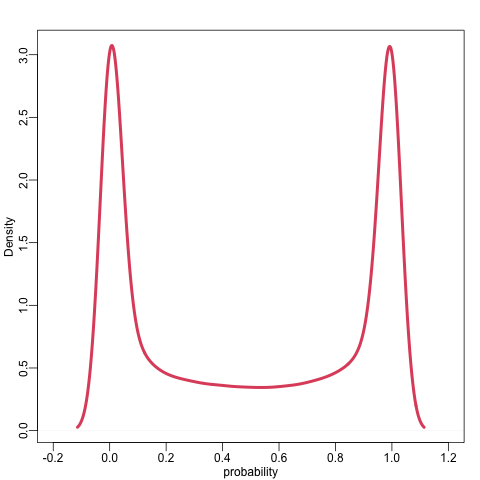

<IPython.core.display.Javascript object>

In [5]:
%%R

abar <- rnorm(1e5,0,1.5)
s <- rexp(1e5,0.1)
a <- rnorm(1e5,abar,s)
dens( a , xlim=c(-20,20) , lwd=4 , col=2 , xlab="a_j" , ylab="Density" , adj=1 )
dens( logistic(a) , xlim=c(-0.2,1.2) , lwd=4 , col=2 , xlab="probability" , ylab="Density" , adj=1 )

# Pymc with Exp(0.1)

In [6]:
exp = 0.1

with pm.Model() as mq1a:

    # define priors
    a_bar = pm.Normal("a_bar", mu=0, sd=1)
    sigma = pm.Exponential("sigma", exp)

    # adaptive prior
    a_j = pm.Normal("a_j", a_bar, sigma)

    # link function
    p = pm.Deterministic("p", pm.math.invlogit(a_j))

    # generate prior predictive samples
    prior_pred = pm.sample_prior_predictive(1000, var_names=['a_j', 'p'])

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'probability'), Text(0, 0.5, 'density')]

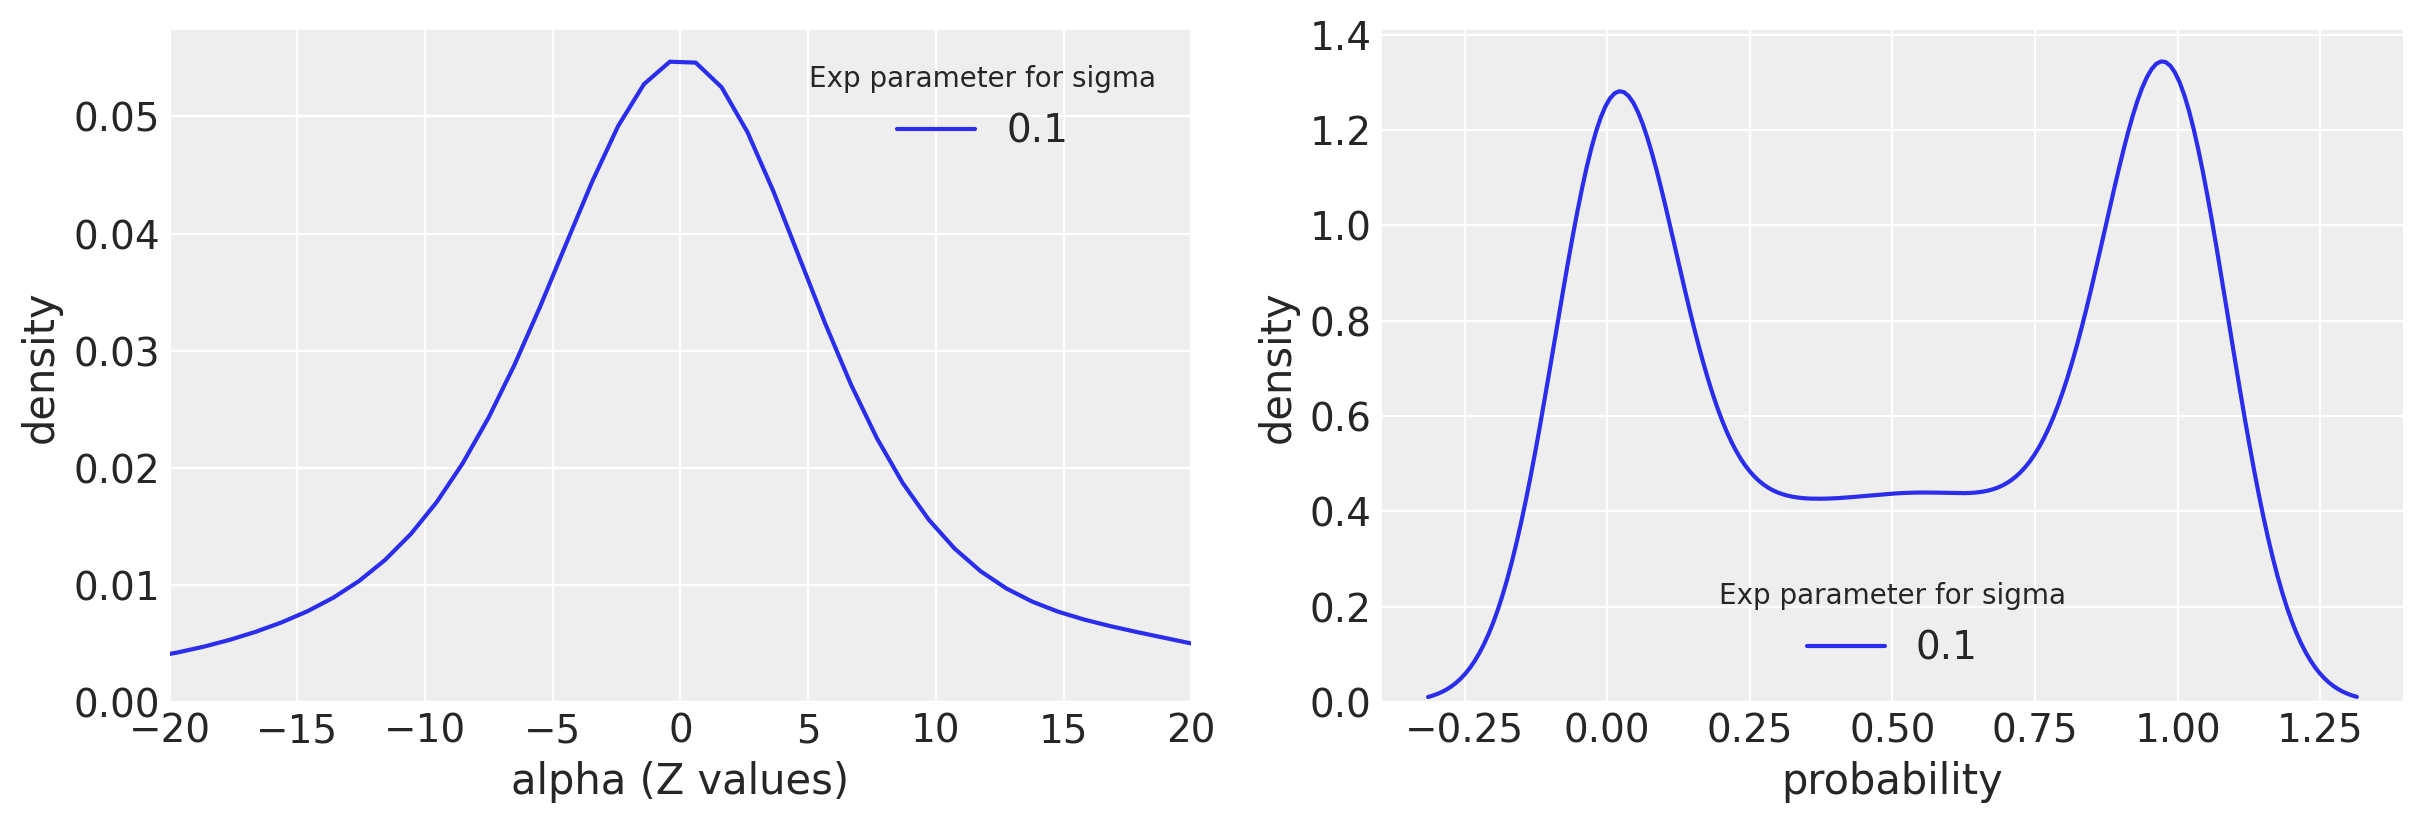

<IPython.core.display.Javascript object>

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.kdeplot(prior_pred['a_j'], ax=ax1, label=f'{exp}')
sns.kdeplot(prior_pred['p'], ax=ax2, label=f'{exp}')

ax1.legend(title='Exp parameter for sigma')
ax1.set(xlabel='alpha (Z values)', ylabel='density', xlim=[-20, 20])

ax2.legend(title='Exp parameter for sigma')
ax2.set(xlabel='probability', ylabel='density')

## Scipy.stats simulation - WRONG WAY (didn't parameterize lambda correctly)

[Text(0.5, 0, 'probability'), Text(0, 0.5, 'density')]

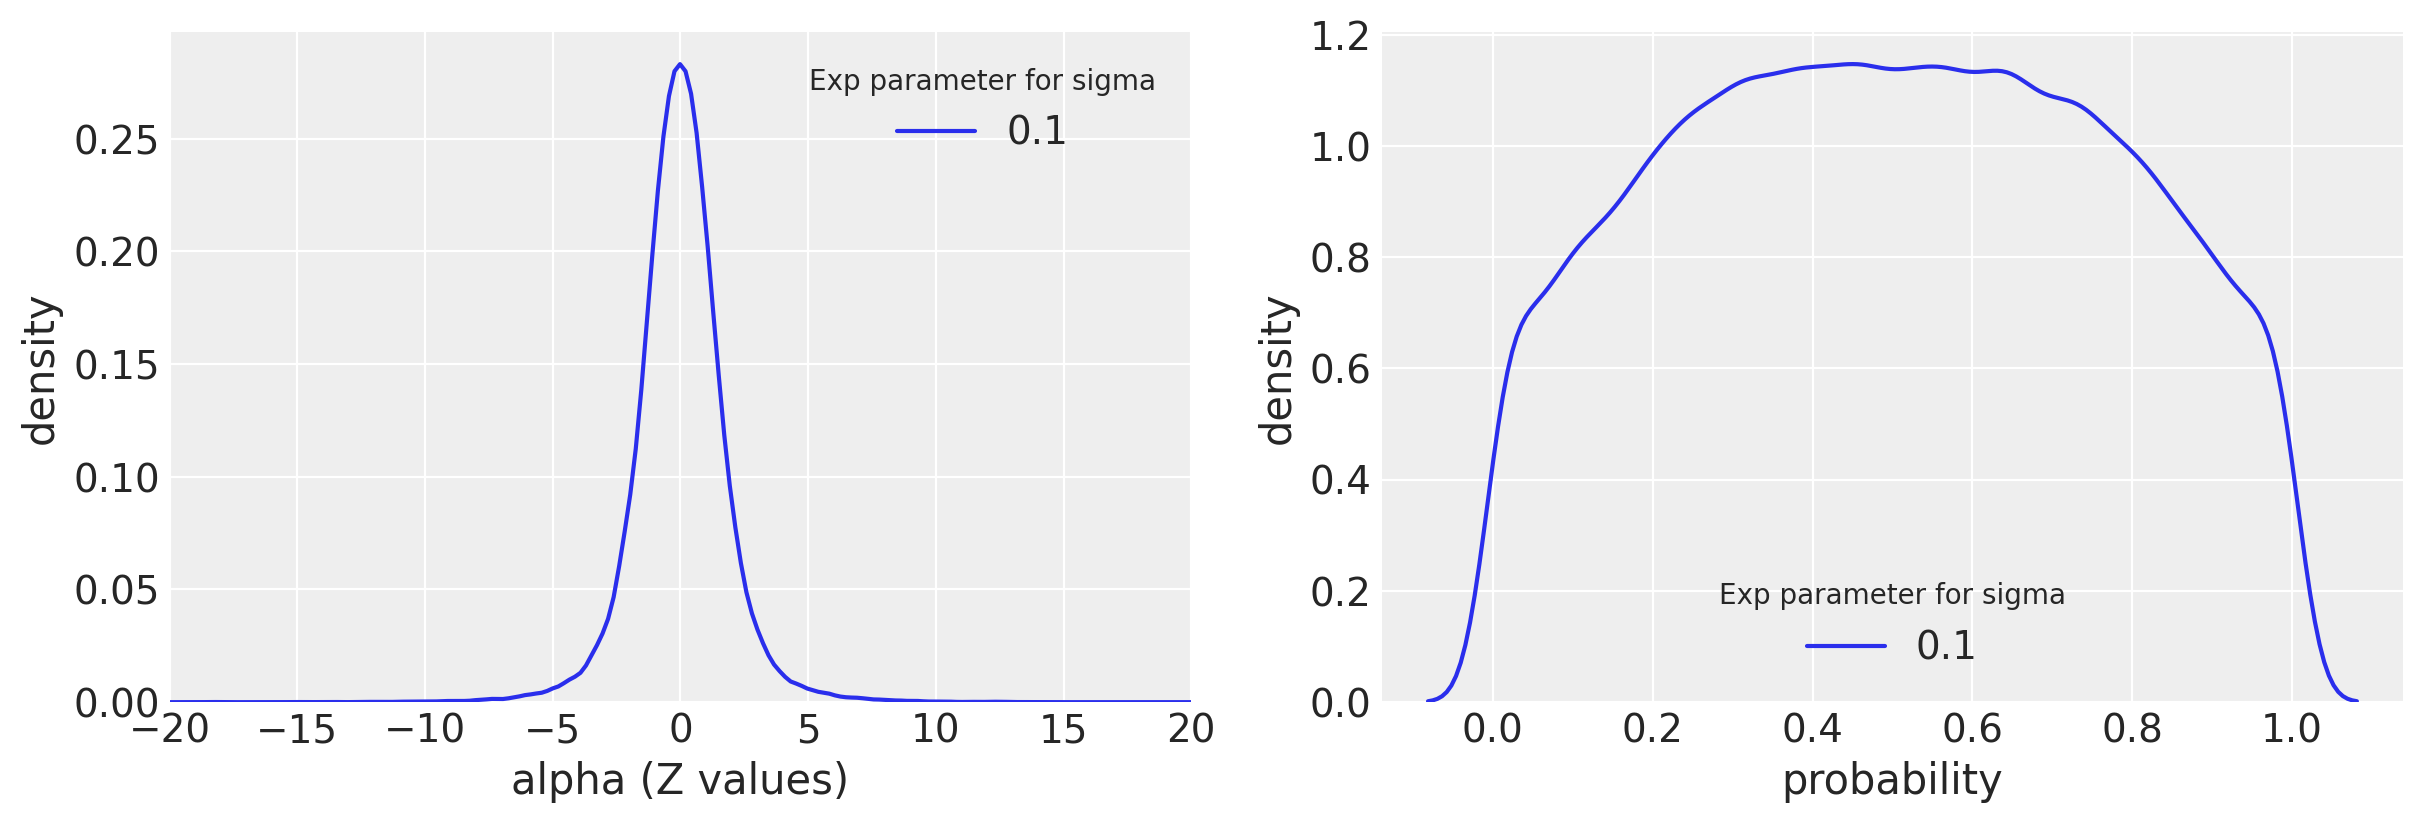

<IPython.core.display.Javascript object>

In [8]:
exp = 0.1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

abar = stats.norm.rvs(0, 1, size=10**5)
s = stats.expon.rvs(0.1, size=10**5)
a = stats.norm.rvs(abar, s, size=10**5)
sns.kdeplot(a, ax=ax1, label=f'{exp}')
sns.kdeplot(expit(a), ax=ax2, label=f'{exp}')

ax1.legend(title='Exp parameter for sigma')
ax1.set(xlabel='alpha (Z values)', ylabel='density', xlim=[-20, 20])

ax2.legend(title='Exp parameter for sigma')
ax2.set(xlabel='probability', ylabel='density')

Why is this wrong? From [the scipy.stats documentation for the exponential distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html):

> A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.

The [`pymc` documentation for the exponential distribution](https://docs.pymc.io/en/latest/api/distributions/generated/pymc.Exponential.html) uses the lambda value more directly.


## Scipy.stats simulation - CORRECT WAY

[Text(0.5, 0, 'probability'), Text(0, 0.5, 'density')]

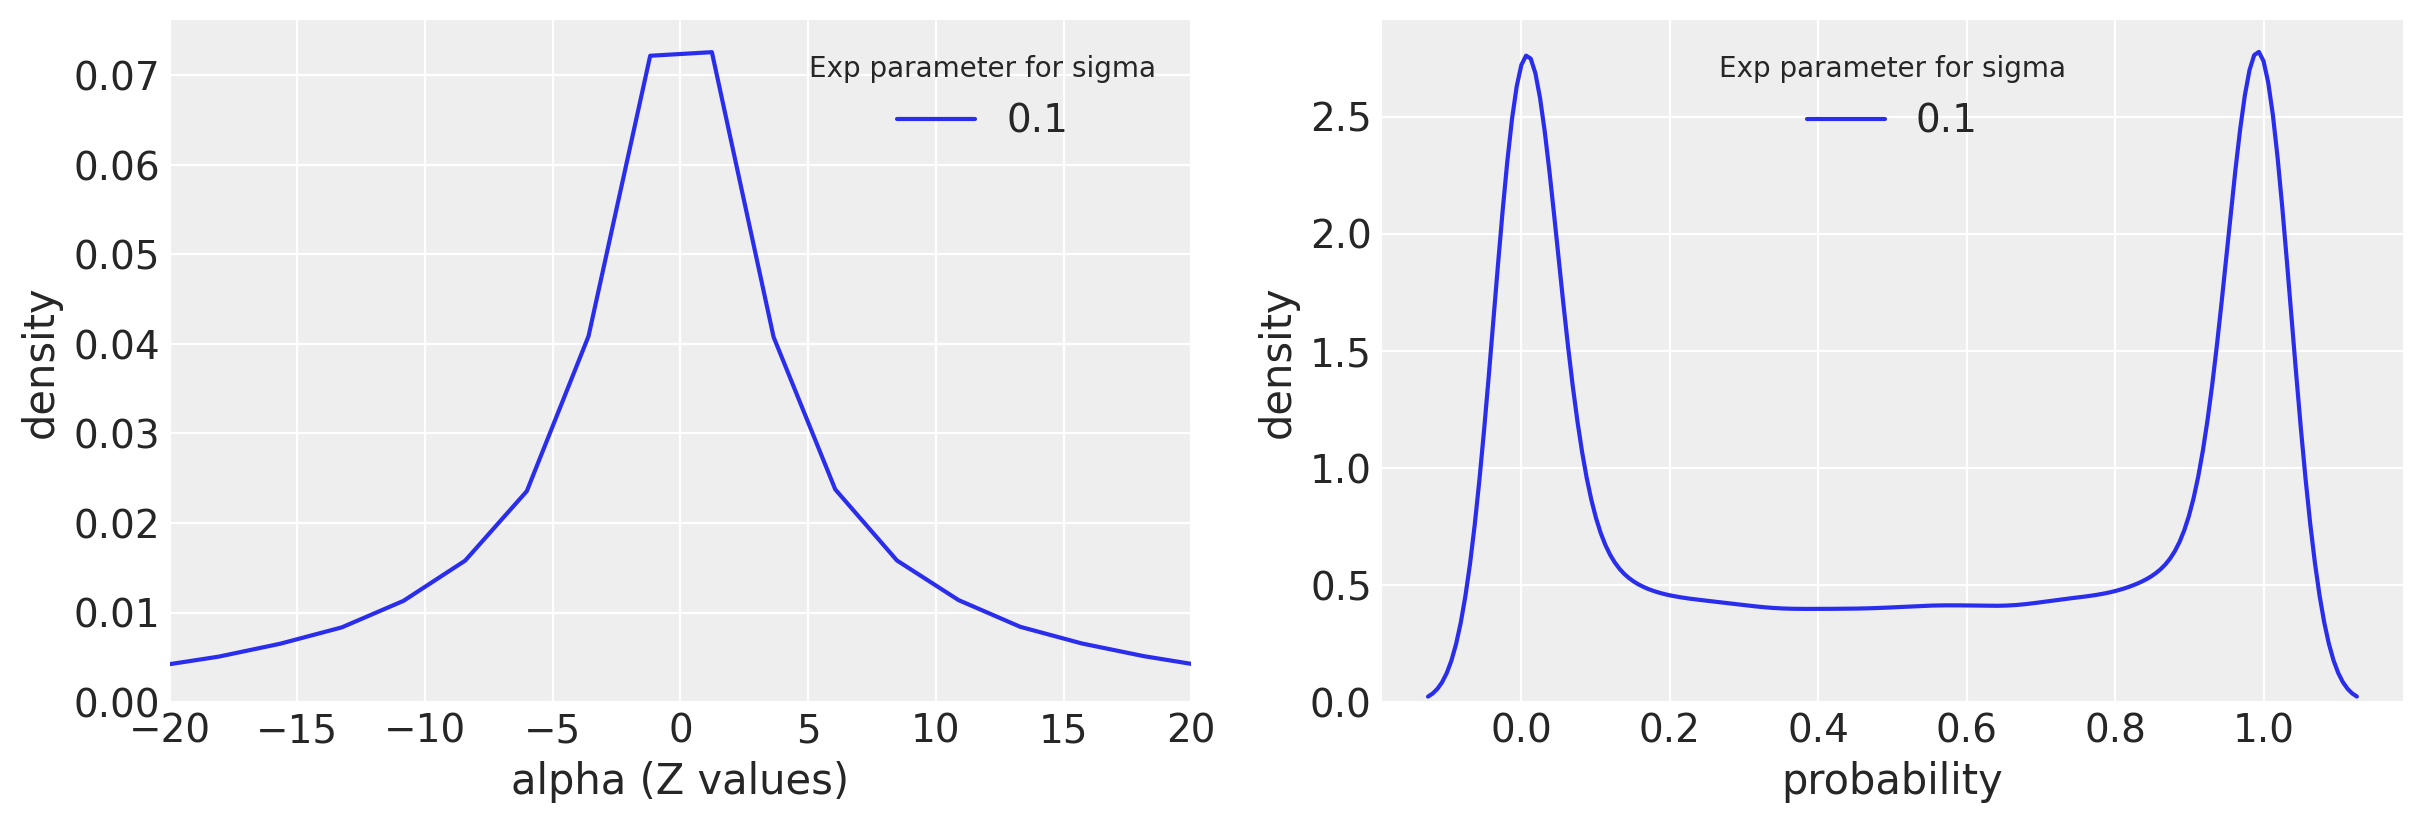

<IPython.core.display.Javascript object>

In [9]:
exp = 0.1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

abar = stats.norm.rvs(0, 1, size=10**5)
s = stats.expon.rvs(scale = 1/exp, size=10**5)
a = stats.norm.rvs(abar, s, size=10**5)
sns.kdeplot(a, ax=ax1, label=f'{exp}')
sns.kdeplot(expit(a), ax=ax2, label=f'{exp}')

ax1.legend(title='Exp parameter for sigma')
ax1.set(xlabel='alpha (Z values)', ylabel='density', xlim=[-20, 20])

ax2.legend(title='Exp parameter for sigma')
ax2.set(xlabel='probability', ylabel='density')

# McElreath R code with Exp(10)

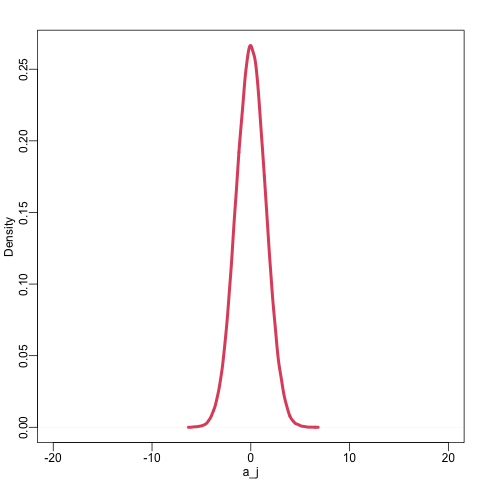

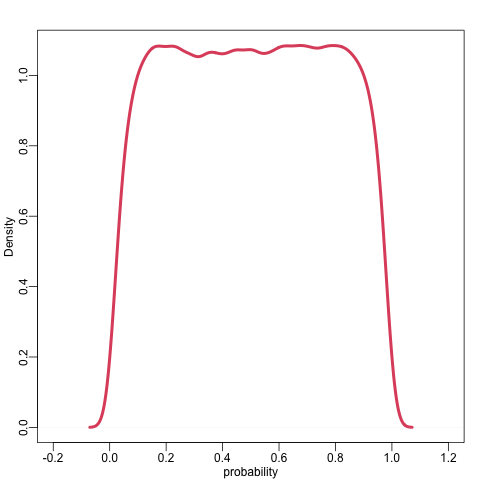

<IPython.core.display.Javascript object>

In [10]:
%%R

abar <- rnorm(1e5,0,1.5)
s <- rexp(1e5,10)
a <- rnorm(1e5,abar,s)
dens( a , xlim=c(-20,20) , lwd=4 , col=2 , xlab="a_j" , ylab="Density" , adj=1 )
dens( logistic(a) , xlim=c(-0.2,1.2) , lwd=4 , col=2 , xlab="probability" , ylab="Density" , adj=1 )

Why is higher lambda value associated with more uniform probability?

That is how the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is. It's easier to see testing lambda values of 0.5, 1, 1.5.

(-0.5, 5.0)

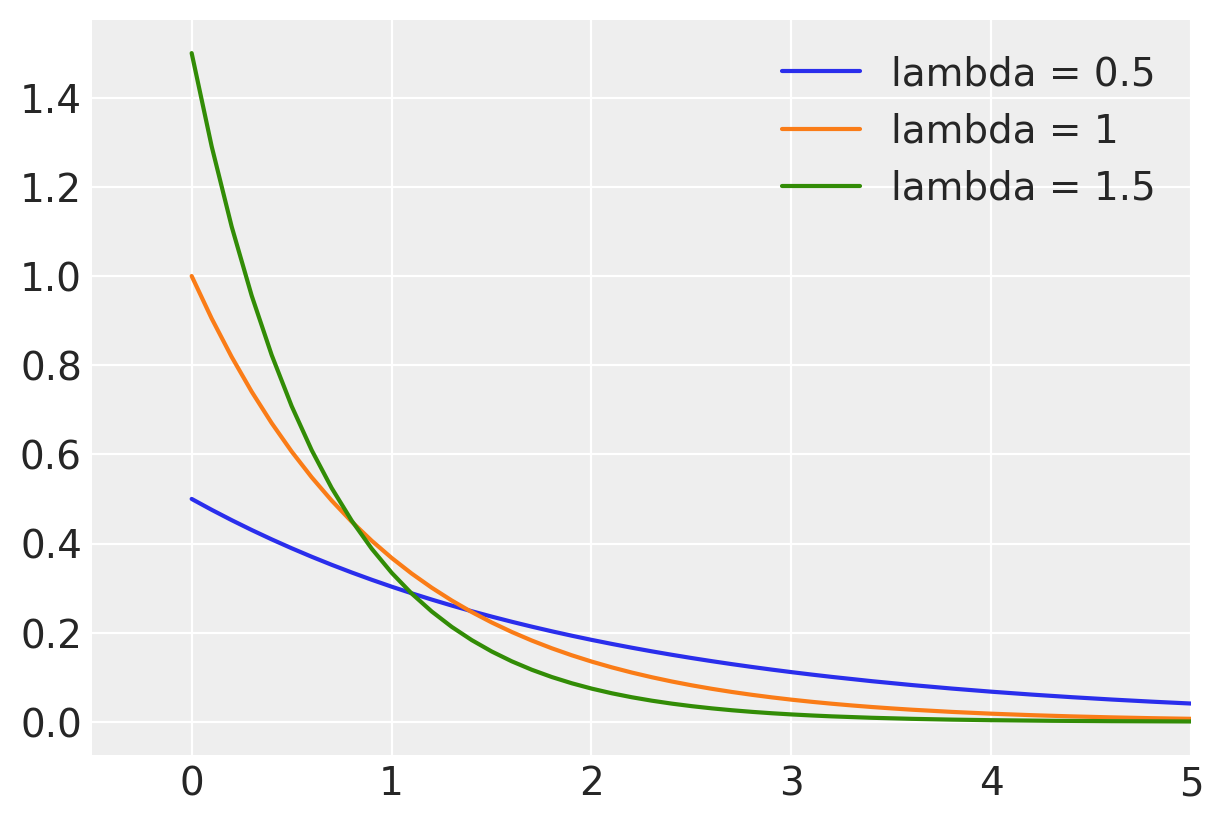

<IPython.core.display.Javascript object>

In [11]:
# check shape of exponential priors on sigma

f, ax1 = plt.subplots(1, 1, figsize=(6, 4))

# lambda_values = [0.1, 1, 10]
lambda_values = [0.5, 1, 1.5]
x = np.linspace(0, 100, 1000)
for lamb in lambda_values:
    y = stats.expon.pdf(x, scale=1/lamb)
    ax1.plot(x, y, label=f"lambda = {lamb}")
ax1.legend()
ax1.set_xlim([-0.5, 5])

Appendix: Environment and system parameters

In [12]:
%watermark -n -u -v -iv -w

Last updated: Wed Feb 16 2022

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.20.0

scipy     : 1.6.0
numpy     : 1.20.1
pymc3     : 3.11.0
arviz     : 0.11.1
sys       : 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:22:12) 
[Clang 11.0.1 ]
pandas    : 1.2.1
seaborn   : 0.11.1
matplotlib: 3.3.4

Watermark: 2.1.0



<IPython.core.display.Javascript object>